# Systematic Sampling in Data Mining

## Learning Objectives
By the end of this notebook, you will understand:
- The concept and mechanics of systematic sampling
- How systematic sampling differs from simple random and stratified sampling
- When systematic sampling is most appropriate and efficient
- How to calculate sampling intervals and starting points
- Potential biases and limitations of systematic sampling
- Practical applications in data mining and quality control

## Introduction
Systematic sampling is a probability sampling technique where elements are selected from an ordered list at regular intervals. After selecting a random starting point, every kth element is chosen, where k is the sampling interval. This method combines the simplicity of convenience sampling with the statistical rigor of probability sampling.

**Key Characteristics:**
- **Ordered population**: Requires a sequential list or natural ordering
- **Fixed interval**: Constant spacing between selected elements  
- **Random start**: First element chosen randomly within the first interval
- **Efficiency**: Simpler than stratified sampling, more systematic than random sampling

Systematic sampling is particularly valuable for:
- Quality control in manufacturing
- Audit sampling in accounting
- Time series data analysis
- Large dataset subsampling
- Survey research with ordered populations

In [1]:
# Import Required Libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from math import floor, ceil

print("Libraries imported successfully!")
print(f"NumPy version: {np.__version__}")
print(f"Pandas version: {pd.__version__}")

Libraries imported successfully!
NumPy version: 1.26.4
Pandas version: 2.3.1


## Step 1: Create Sample Dataset

Let's create a customer dataset that demonstrates both random and potentially ordered characteristics to explore systematic sampling behavior.

In [2]:
# Sample dataset: Customer data with 100 records
np.random.seed(42)  # For reproducible results

# Create dataset with some inherent patterns to demonstrate systematic sampling
data = {
    "Customer_ID": np.arange(1, 101),  # 100 customers (sequential ordering)
    "Age": np.random.randint(18, 70, 100),  # Random ages between 18 and 70
    "Income": np.random.randint(20000, 120000, 100),  # Random income between 20k and 120k
    "Spending_Score": np.random.randint(1, 100, 100)  # Random spending scores between 1 and 100
}

# Add a subtle trend to demonstrate systematic sampling with patterns
# Simulate slightly higher income for later customers (business growth)
trend_adjustment = np.linspace(0, 15000, 100)
data["Income"] = data["Income"] + trend_adjustment.astype(int)

df = pd.DataFrame(data)
print("Original Dataset Shape:", df.shape)
print("\nFirst 10 rows of the original dataset:")
print(df.head(10))
print("\nLast 10 rows showing potential trend:")
print(df.tail(10))

Original Dataset Shape: (100, 4)

First 10 rows of the original dataset:
   Customer_ID  Age  Income  Spending_Score
0            1   56   81228              59
1            2   69   69135              32
2            3   46   61077              96
3            4   32   23022              88
4            5   60   83198              52
5            6   25   88320              62
6            7   38   23604              58
7            8   56   69250              52
8            9   36   26470              12
9           10   40  108901              39

Last 10 rows showing potential trend:
    Customer_ID  Age  Income  Spending_Score
90           91   62   91689              19
91           92   35   55746              48
92           93   64   39469              80
93           94   41  128946               3
94           95   43   37990              20
95           96   42  131897              24
96           97   62  132643              54
97           98   58   48241              33

## Step 2: Basic Dataset Analysis

Let's examine the dataset characteristics to understand what systematic sampling might capture or miss.

Dataset Statistics:
       Customer_ID         Age       Income  Spending_Score
count   100.000000  100.000000     100.0000      100.000000
mean     50.500000   43.350000   76974.2100       48.760000
std      29.011492   14.904663   30325.4235       31.064976
min       1.000000   19.000000   23022.0000        1.000000
25%      25.750000   31.750000   52728.2500       20.000000
50%      50.500000   42.000000   77673.5000       52.000000
75%      75.250000   57.000000  101619.0000       73.500000
max     100.000000   69.000000  132643.0000       99.000000

Trend Analysis:
First 25 customers - Average Income: $60,491
Middle 25 customers - Average Income: $86,774
Last 25 customers - Average Income: $75,744


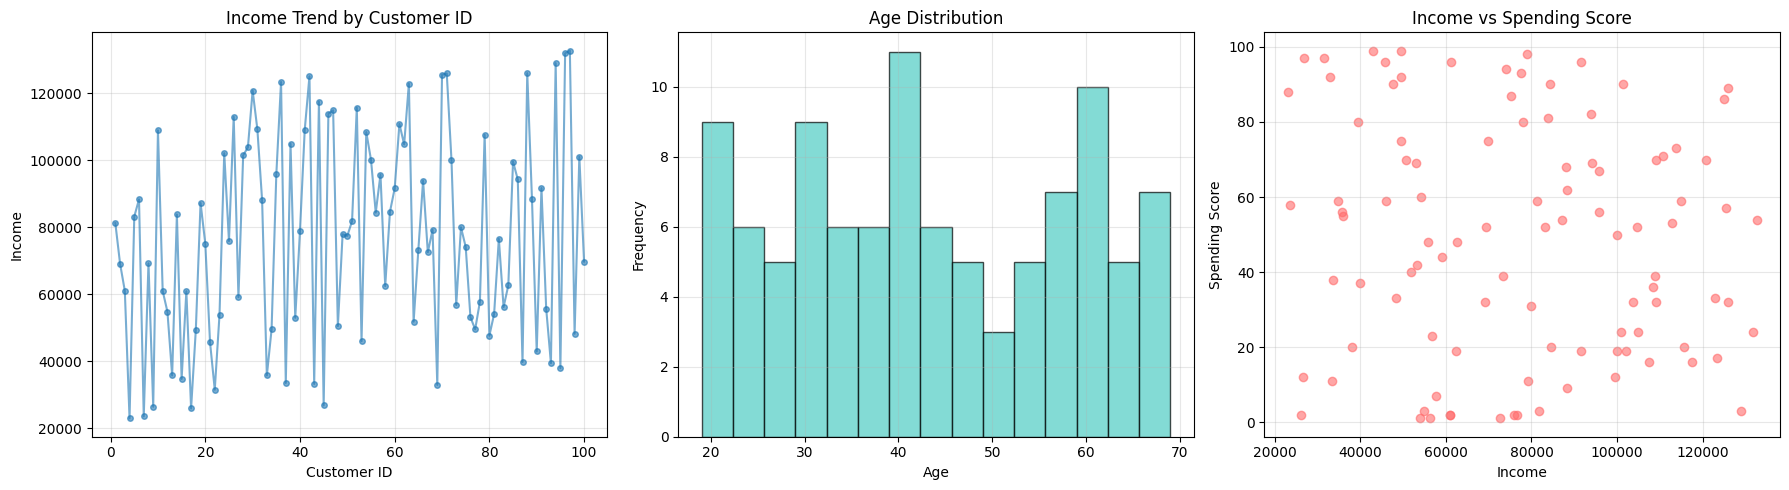

In [3]:
# Analyze dataset trends and patterns
print("Dataset Statistics:")
print(df.describe())

# Check for trends in the data
print(f"\nTrend Analysis:")
print(f"First 25 customers - Average Income: ${df.iloc[:25]['Income'].mean():,.0f}")
print(f"Middle 25 customers - Average Income: ${df.iloc[37:62]['Income'].mean():,.0f}")
print(f"Last 25 customers - Average Income: ${df.iloc[75:]['Income'].mean():,.0f}")

# Visualize potential patterns
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Plot 1: Income trend over customer IDs
axes[0].plot(df['Customer_ID'], df['Income'], 'o-', alpha=0.6, markersize=4)
axes[0].set_xlabel('Customer ID')
axes[0].set_ylabel('Income')
axes[0].set_title('Income Trend by Customer ID')
axes[0].grid(True, alpha=0.3)

# Plot 2: Age distribution
axes[1].hist(df['Age'], bins=15, alpha=0.7, color='#4ECDC4', edgecolor='black')
axes[1].set_xlabel('Age')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Age Distribution')
axes[1].grid(True, alpha=0.3)

# Plot 3: Spending Score vs Income
axes[2].scatter(df['Income'], df['Spending_Score'], alpha=0.6, color='#FF6B6B')
axes[2].set_xlabel('Income')
axes[2].set_ylabel('Spending Score')
axes[2].set_title('Income vs Spending Score')
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## Step 3: Basic Systematic Sampling

Let's implement the basic systematic sampling approach from the original script and understand its mechanics.

In [4]:
# Basic Systematic Sampling: Select every 10th record
INTERVAL = 10  # Sampling interval
df_systematic_basic = df.iloc[::INTERVAL]

print(f"Basic Systematic Sampling Results:")
print(f"Sampling interval: {INTERVAL}")
print(f"Starting point: 0 (first record)")
print(f"Sample size: {len(df_systematic_basic)}")
print(f"Sampling fraction: {len(df_systematic_basic)/len(df):.1%}")

print(f"\nSystematically Selected Sample (every {INTERVAL}th observation):")
print(df_systematic_basic)

# Calculate basic statistics for comparison
print(f"\nBasic Statistical Comparison:")
print(f"{'Metric':<15} {'Original':<12} {'Systematic':<12} {'Difference':<12}")
print("-" * 55)
print(f"{'Mean Age':<15} {df['Age'].mean():<12.1f} {df_systematic_basic['Age'].mean():<12.1f} {abs(df['Age'].mean() - df_systematic_basic['Age'].mean()):<12.1f}")
print(f"{'Mean Income':<15} {df['Income'].mean():<12.0f} {df_systematic_basic['Income'].mean():<12.0f} {abs(df['Income'].mean() - df_systematic_basic['Income'].mean()):<12.0f}")
print(f"{'Mean Score':<15} {df['Spending_Score'].mean():<12.1f} {df_systematic_basic['Spending_Score'].mean():<12.1f} {abs(df['Spending_Score'].mean() - df_systematic_basic['Spending_Score'].mean()):<12.1f}")

Basic Systematic Sampling Results:
Sampling interval: 10
Starting point: 0 (first record)
Sample size: 10
Sampling fraction: 10.0%

Systematically Selected Sample (every 10th observation):
    Customer_ID  Age  Income  Spending_Score
0             1   56   81228              59
10           11   28   61019               2
20           21   61   45692              96
30           31   66  109196              32
40           41   20  109008              70
50           51   31   81843               3
60           61   25  110824              71
70           71   23  125865              89
80           81   31   54097              60
90           91   62   91689              19

Basic Statistical Comparison:
Metric          Original     Systematic   Difference  
-------------------------------------------------------
Mean Age        43.4         40.3         3.1         
Mean Income     76974        87046        10072       
Mean Score      48.8         50.1         1.3         


## Step 4: Proper Systematic Sampling with Random Start

True systematic sampling should begin with a random starting point within the first interval, not always from the first element.

In [5]:
def systematic_sampling(data, sample_size, random_state=42):
    """
    Perform systematic sampling with proper random starting point
    
    Parameters:
    data: DataFrame to sample from
    sample_size: Desired number of samples
    random_state: Random seed for reproducibility
    
    Returns:
    DataFrame with systematically sampled data
    """
    np.random.seed(random_state)
    
    population_size = len(data)
    
    # Calculate sampling interval
    interval = population_size // sample_size
    
    # Random starting point within the first interval
    start = np.random.randint(0, interval)
    
    # Generate systematic sample indices
    indices = []
    current_index = start
    
    while current_index < population_size:
        indices.append(current_index)
        current_index += interval
    
    # Return the systematic sample
    systematic_sample = data.iloc[indices].copy()
    
    return systematic_sample, interval, start

# Apply proper systematic sampling for 10 samples
sample_size = 10
df_systematic_proper, interval, start_point = systematic_sampling(df, sample_size, random_state=42)

print(f"Proper Systematic Sampling Results:")
print(f"Population size: {len(df)}")
print(f"Desired sample size: {sample_size}")
print(f"Calculated interval: {interval}")
print(f"Random starting point: {start_point}")
print(f"Actual sample size: {len(df_systematic_proper)}")

print(f"\nSystematic Sample with Random Start:")
print(df_systematic_proper[['Customer_ID', 'Age', 'Income', 'Spending_Score']])

# Show the sampling pattern
selected_ids = df_systematic_proper['Customer_ID'].tolist()
print(f"\nSelected Customer IDs: {selected_ids}")
print(f"Sampling pattern: Start at {start_point}, then every {interval}th element")

Proper Systematic Sampling Results:
Population size: 100
Desired sample size: 10
Calculated interval: 10
Random starting point: 6
Actual sample size: 10

Systematic Sample with Random Start:
    Customer_ID  Age  Income  Spending_Score
6             7   38   23604              58
16           17   20   25985               2
26           27   29   59161              44
36           37   64   33564              38
46           47   56  114866              59
56           57   45   95698              67
66           67   67   72557               1
76           77   61   49562              99
86           87   40   39806              37
96           97   62  132643              54

Selected Customer IDs: [7, 17, 27, 37, 47, 57, 67, 77, 87, 97]
Sampling pattern: Start at 6, then every 10th element


## Step 5: Multiple Systematic Samples with Different Starting Points

Let's generate multiple systematic samples with different random starting points to understand variability.

In [6]:
# Generate multiple systematic samples with different starting points
def compare_systematic_samples(data, sample_size, num_samples=5):
    """
    Generate multiple systematic samples and compare their characteristics
    """
    
    results = []
    
    for i in range(num_samples):
        sample, interval, start = systematic_sampling(data, sample_size, random_state=i+42)
        
        result = {
            'Sample_ID': i + 1,
            'Start_Point': start,
            'Interval': interval,
            'Sample_Size': len(sample),
            'Mean_Age': sample['Age'].mean(),
            'Mean_Income': sample['Income'].mean(),
            'Mean_Score': sample['Spending_Score'].mean(),
            'Min_Customer_ID': sample['Customer_ID'].min(),
            'Max_Customer_ID': sample['Customer_ID'].max()
        }
        
        results.append(result)
    
    return pd.DataFrame(results)

# Compare 5 different systematic samples
comparison_results = compare_systematic_samples(df, sample_size=10, num_samples=5)

print("Comparison of Systematic Samples with Different Starting Points:")
print(comparison_results.round(2))

# Calculate variability statistics
print(f"\nVariability Analysis:")
print(f"Age Mean - Range: {comparison_results['Mean_Age'].max() - comparison_results['Mean_Age'].min():.1f}")
print(f"Income Mean - Range: ${comparison_results['Mean_Income'].max() - comparison_results['Mean_Income'].min():.0f}")
print(f"Score Mean - Range: {comparison_results['Mean_Score'].max() - comparison_results['Mean_Score'].min():.1f}")

# Original population statistics for comparison
print(f"\nPopulation Statistics for Reference:")
print(f"Population Mean Age: {df['Age'].mean():.1f}")
print(f"Population Mean Income: ${df['Income'].mean():.0f}")
print(f"Population Mean Score: {df['Spending_Score'].mean():.1f}")

Comparison of Systematic Samples with Different Starting Points:
   Sample_ID  Start_Point  Interval  Sample_Size  Mean_Age  Mean_Income  \
0          1            6        10           10      48.2      64744.6   
1          2            4        10           10      38.2      70157.6   
2          3            4        10           10      38.2      70157.6   
3          4            3        10           10      36.6      80778.7   
4          5            5        10           10      38.0      95698.1   

   Mean_Score  Min_Customer_ID  Max_Customer_ID  
0        45.9                7               97  
1        45.0                5               95  
2        45.0                5               95  
3        43.7                4               94  
4        51.4                6               96  

Variability Analysis:
Age Mean - Range: 11.6
Income Mean - Range: $30954
Score Mean - Range: 7.7

Population Statistics for Reference:
Population Mean Age: 43.4
Population Mean Income

## Step 6: Comparison with Other Sampling Methods

Let's compare systematic sampling with simple random sampling and stratified sampling to understand their relative strengths.

In [7]:
# Compare systematic sampling with other methods
def compare_sampling_methods(data, sample_size=10, random_state=42):
    """
    Compare systematic, random, and stratified sampling methods
    """
    
    # 1. Systematic Sampling
    systematic_sample, _, _ = systematic_sampling(data, sample_size, random_state)
    
    # 2. Simple Random Sampling
    random_sample = data.sample(n=sample_size, random_state=random_state)
    
    # 3. Stratified Sampling (using age groups as strata)
    # Create age groups for stratification
    data_with_strata = data.copy()
    data_with_strata['Age_Group'] = pd.cut(data_with_strata['Age'], 
                                          bins=[0, 30, 50, 100], 
                                          labels=['Young', 'Middle', 'Senior'])
    
    # Proportional stratified sampling
    strata_samples = []
    for stratum in data_with_strata['Age_Group'].unique():
        stratum_data = data_with_strata[data_with_strata['Age_Group'] == stratum]
        stratum_proportion = len(stratum_data) / len(data_with_strata)
        stratum_sample_size = max(1, int(stratum_proportion * sample_size))
        
        if len(stratum_data) >= stratum_sample_size:
            stratum_sample = stratum_data.sample(n=stratum_sample_size, random_state=random_state)
            strata_samples.append(stratum_sample)
    
    stratified_sample = pd.concat(strata_samples).drop('Age_Group', axis=1)
    
    # Compare results
    comparison = {
        'Method': ['Original Population', 'Systematic', 'Random', 'Stratified'],
        'Sample_Size': [len(data), len(systematic_sample), len(random_sample), len(stratified_sample)],
        'Mean_Age': [data['Age'].mean(), systematic_sample['Age'].mean(), 
                    random_sample['Age'].mean(), stratified_sample['Age'].mean()],
        'Mean_Income': [data['Income'].mean(), systematic_sample['Income'].mean(),
                       random_sample['Income'].mean(), stratified_sample['Income'].mean()],
        'Mean_Score': [data['Spending_Score'].mean(), systematic_sample['Spending_Score'].mean(),
                      random_sample['Spending_Score'].mean(), stratified_sample['Spending_Score'].mean()],
        'Age_Std': [data['Age'].std(), systematic_sample['Age'].std(),
                   random_sample['Age'].std(), stratified_sample['Age'].std()],
        'Income_Std': [data['Income'].std(), systematic_sample['Income'].std(),
                      random_sample['Income'].std(), stratified_sample['Income'].std()]
    }
    
    comparison_df = pd.DataFrame(comparison)
    
    return comparison_df, systematic_sample, random_sample, stratified_sample

# Perform comparison
comparison_df, sys_sample, rand_sample, strat_sample = compare_sampling_methods(df, sample_size=10)

print("Sampling Methods Comparison:")
print(comparison_df.round(2))

# Calculate absolute differences from population means
pop_age_mean = df['Age'].mean()
pop_income_mean = df['Income'].mean()
pop_score_mean = df['Spending_Score'].mean()

print(f"\nAbsolute Differences from Population Means:")
print(f"{'Method':<12} {'Age Diff':<10} {'Income Diff':<12} {'Score Diff':<10}")
print("-" * 50)

for idx, method in enumerate(['Systematic', 'Random', 'Stratified']):
    age_diff = abs(comparison_df.iloc[idx+1]['Mean_Age'] - pop_age_mean)
    income_diff = abs(comparison_df.iloc[idx+1]['Mean_Income'] - pop_income_mean)
    score_diff = abs(comparison_df.iloc[idx+1]['Mean_Score'] - pop_score_mean)
    
    print(f"{method:<12} {age_diff:<10.1f} {income_diff:<12.0f} {score_diff:<10.1f}")

Sampling Methods Comparison:
                Method  Sample_Size  Mean_Age  Mean_Income  Mean_Score  \
0  Original Population          100     43.35     76974.21       48.76   
1           Systematic           10     48.20     64744.60       45.90   
2               Random           10     40.10     76676.30       56.30   
3           Stratified            9     41.11     73512.78       61.89   

   Age_Std  Income_Std  
0    14.90    30325.42  
1    16.21    38285.77  
2    15.31    31245.41  
3    15.04    29425.37  

Absolute Differences from Population Means:
Method       Age Diff   Income Diff  Score Diff
--------------------------------------------------
Systematic   4.9        12230        2.9       
Random       3.2        298          7.5       
Stratified   2.2        3461         13.1      


## Step 7: Visualization Comparison

Let's create comprehensive visualizations to compare systematic sampling with other methods and the original dataset.

/var/folders/q3/2tkw4wl936l357n57y8sx0x80000gn/T/ipykernel_70830/3854072257.py:74: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = axes[1, 1].boxplot(age_data, labels=methods, patch_artist=True)


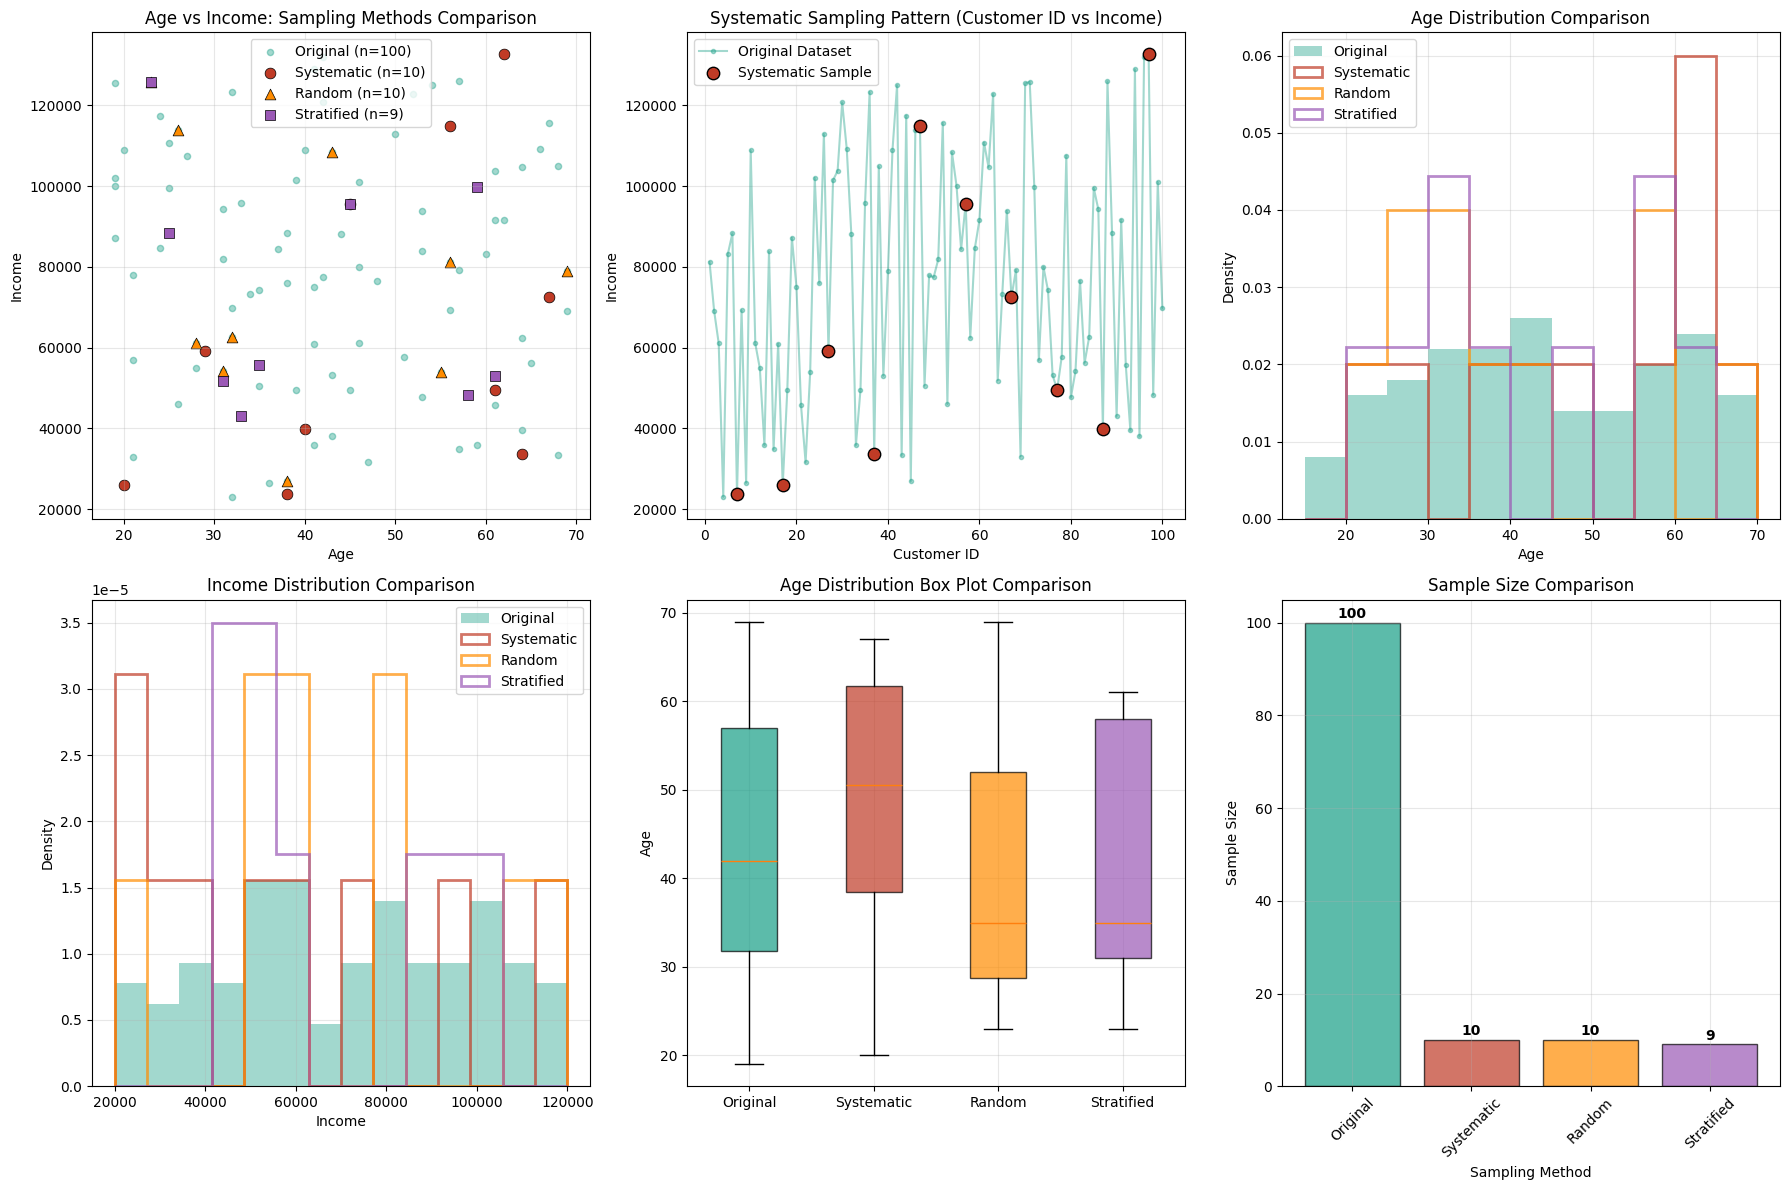

In [8]:
# Create comprehensive visualization comparing all sampling methods
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Define colors for consistency
colors = {
    'Original': '#179E86',
    'Systematic': '#C03B26', 
    'Random': '#FF8C00',
    'Stratified': '#9B59B6'
}

# Plot 1: Age vs Income scatter plot
axes[0, 0].scatter(df['Age'], df['Income'], alpha=0.4, color=colors['Original'], 
                   s=20, label=f'Original (n={len(df)})')
axes[0, 0].scatter(sys_sample['Age'], sys_sample['Income'], color=colors['Systematic'], 
                   s=60, label=f'Systematic (n={len(sys_sample)})', edgecolor='black', linewidth=0.5)
axes[0, 0].scatter(rand_sample['Age'], rand_sample['Income'], color=colors['Random'], 
                   s=60, label=f'Random (n={len(rand_sample)})', marker='^', edgecolor='black', linewidth=0.5)
axes[0, 0].scatter(strat_sample['Age'], strat_sample['Income'], color=colors['Stratified'], 
                   s=60, label=f'Stratified (n={len(strat_sample)})', marker='s', edgecolor='black', linewidth=0.5)
axes[0, 0].set_xlabel('Age')
axes[0, 0].set_ylabel('Income')
axes[0, 0].set_title('Age vs Income: Sampling Methods Comparison')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# Plot 2: Customer ID vs Income (showing systematic pattern)
axes[0, 1].plot(df['Customer_ID'], df['Income'], 'o-', alpha=0.4, color=colors['Original'], 
                markersize=3, label='Original Dataset')
axes[0, 1].scatter(sys_sample['Customer_ID'], sys_sample['Income'], color=colors['Systematic'], 
                   s=80, label='Systematic Sample', edgecolor='black', linewidth=1, zorder=5)
axes[0, 1].set_xlabel('Customer ID')
axes[0, 1].set_ylabel('Income')
axes[0, 1].set_title('Systematic Sampling Pattern (Customer ID vs Income)')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# Plot 3: Age distribution comparison
bins = range(15, 75, 5)
axes[0, 2].hist(df['Age'], bins=bins, alpha=0.4, color=colors['Original'], 
                label='Original', density=True)
axes[0, 2].hist(sys_sample['Age'], bins=bins, alpha=0.7, color=colors['Systematic'], 
                label='Systematic', density=True, histtype='step', linewidth=2)
axes[0, 2].hist(rand_sample['Age'], bins=bins, alpha=0.7, color=colors['Random'], 
                label='Random', density=True, histtype='step', linewidth=2)
axes[0, 2].hist(strat_sample['Age'], bins=bins, alpha=0.7, color=colors['Stratified'], 
                label='Stratified', density=True, histtype='step', linewidth=2)
axes[0, 2].set_xlabel('Age')
axes[0, 2].set_ylabel('Density')
axes[0, 2].set_title('Age Distribution Comparison')
axes[0, 2].legend()
axes[0, 2].grid(True, alpha=0.3)

# Plot 4: Income distribution comparison  
income_bins = np.linspace(20000, 120000, 15)
axes[1, 0].hist(df['Income'], bins=income_bins, alpha=0.4, color=colors['Original'], 
                label='Original', density=True)
axes[1, 0].hist(sys_sample['Income'], bins=income_bins, alpha=0.7, color=colors['Systematic'], 
                label='Systematic', density=True, histtype='step', linewidth=2)
axes[1, 0].hist(rand_sample['Income'], bins=income_bins, alpha=0.7, color=colors['Random'], 
                label='Random', density=True, histtype='step', linewidth=2)
axes[1, 0].hist(strat_sample['Income'], bins=income_bins, alpha=0.7, color=colors['Stratified'], 
                label='Stratified', density=True, histtype='step', linewidth=2)
axes[1, 0].set_xlabel('Income')
axes[1, 0].set_ylabel('Density')
axes[1, 0].set_title('Income Distribution Comparison')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# Plot 5: Box plot comparison of key metrics
methods = ['Original', 'Systematic', 'Random', 'Stratified']
age_data = [df['Age'], sys_sample['Age'], rand_sample['Age'], strat_sample['Age']]

bp = axes[1, 1].boxplot(age_data, labels=methods, patch_artist=True)
colors_list = [colors['Original'], colors['Systematic'], colors['Random'], colors['Stratified']]
for patch, color in zip(bp['boxes'], colors_list):
    patch.set_facecolor(color)
    patch.set_alpha(0.7)
axes[1, 1].set_ylabel('Age')
axes[1, 1].set_title('Age Distribution Box Plot Comparison')
axes[1, 1].grid(True, alpha=0.3)

# Plot 6: Sampling coverage visualization
axes[1, 2].bar(range(len(methods)), 
               [len(df), len(sys_sample), len(rand_sample), len(strat_sample)],
               color=colors_list, alpha=0.7, edgecolor='black')
axes[1, 2].set_xlabel('Sampling Method')
axes[1, 2].set_ylabel('Sample Size')
axes[1, 2].set_title('Sample Size Comparison')
axes[1, 2].set_xticks(range(len(methods)))
axes[1, 2].set_xticklabels(methods, rotation=45)
axes[1, 2].grid(True, alpha=0.3)

# Add sample size annotations
for i, size in enumerate([len(df), len(sys_sample), len(rand_sample), len(strat_sample)]):
    axes[1, 2].text(i, size + 1, str(size), ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

## Step 8: Advanced Systematic Sampling Techniques

Let's explore more sophisticated systematic sampling approaches for different scenarios.

In [9]:
# Advanced Technique 1: Circular Systematic Sampling
def circular_systematic_sampling(data, sample_size, random_state=42):
    """
    Circular systematic sampling for when population size is not divisible by sample size
    """
    np.random.seed(random_state)
    
    population_size = len(data)
    interval = population_size / sample_size  # Allow fractional interval
    
    start = np.random.randint(0, int(interval))
    indices = []
    
    current_position = start
    for _ in range(sample_size):
        indices.append(int(current_position) % population_size)
        current_position += interval
    
    # Remove duplicates and sort
    indices = sorted(list(set(indices)))
    
    return data.iloc[indices], interval, start

# Apply circular systematic sampling
circular_sample, circular_interval, circular_start = circular_systematic_sampling(df, 15)

print(f"Circular Systematic Sampling:")
print(f"Population size: {len(df)}")
print(f"Requested sample size: 15")
print(f"Actual sample size: {len(circular_sample)}")
print(f"Fractional interval: {circular_interval:.2f}")
print(f"Starting point: {circular_start}")

# Advanced Technique 2: Linear Trend Adjustment
def trend_aware_systematic_sampling(data, trend_column, sample_size, random_state=42):
    """
    Systematic sampling that accounts for linear trends in the data
    """
    # Sort by trend column to ensure proper systematic coverage
    sorted_data = data.sort_values(trend_column).reset_index(drop=True)
    
    # Apply systematic sampling to sorted data
    sample, interval, start = systematic_sampling(sorted_data, sample_size, random_state)
    
    return sample, interval, start

# Apply trend-aware sampling (sorted by income to handle the trend)
trend_sample, trend_interval, trend_start = trend_aware_systematic_sampling(df, 'Income', 12)

print(f"\nTrend-Aware Systematic Sampling (sorted by Income):")
print(f"Sample size: {len(trend_sample)}")
print(f"Income range in sample: ${trend_sample['Income'].min():,} - ${trend_sample['Income'].max():,}")
print(f"Income mean: ${trend_sample['Income'].mean():,.0f}")

# Advanced Technique 3: Stratified Systematic Sampling
def stratified_systematic_sampling(data, strata_column, samples_per_stratum, random_state=42):
    """
    Apply systematic sampling within each stratum
    """
    
    # Create age groups for stratification
    data_copy = data.copy()
    data_copy['Age_Group'] = pd.cut(data_copy['Age'], 
                                   bins=[0, 35, 55, 100], 
                                   labels=['Young', 'Middle', 'Senior'])
    
    stratified_samples = []
    
    for stratum in data_copy['Age_Group'].unique():
        stratum_data = data_copy[data_copy['Age_Group'] == stratum].drop('Age_Group', axis=1)
        
        if len(stratum_data) >= samples_per_stratum:
            stratum_sample, _, _ = systematic_sampling(stratum_data, samples_per_stratum, random_state)
            stratified_samples.append(stratum_sample)
        else:
            # If stratum is too small, take all elements
            stratified_samples.append(stratum_data)
    
    return pd.concat(stratified_samples, ignore_index=True)

# Apply stratified systematic sampling
strat_sys_sample = stratified_systematic_sampling(df, 'Age_Group', 4)

print(f"\nStratified Systematic Sampling (4 per age group):")
print(f"Total sample size: {len(strat_sys_sample)}")

# Show age group distribution
age_groups = pd.cut(strat_sys_sample['Age'], bins=[0, 35, 55, 100], labels=['Young', 'Middle', 'Senior'])
print("Age group distribution in stratified systematic sample:")
print(age_groups.value_counts())

Circular Systematic Sampling:
Population size: 100
Requested sample size: 15
Actual sample size: 15
Fractional interval: 6.67
Starting point: 3

Trend-Aware Systematic Sampling (sorted by Income):
Sample size: 12
Income range in sample: $32,996 - $125,457
Income mean: $77,422

Stratified Systematic Sampling (4 per age group):
Total sample size: 12
Age group distribution in stratified systematic sample:
Age
Young     4
Middle    4
Senior    4
Name: count, dtype: int64


## Step 9: Systematic Sampling Quality Assessment

Let's develop methods to assess the quality and potential biases in systematic sampling.

In [10]:
def assess_systematic_sampling_quality(original_data, systematic_sample, interval, start_point):
    """
    Comprehensive quality assessment for systematic sampling
    """
    
    print("SYSTEMATIC SAMPLING QUALITY ASSESSMENT")
    print("=" * 60)
    
    # 1. Coverage Assessment
    print(f"\n1. COVERAGE ASSESSMENT:")
    print("-" * 30)
    
    population_size = len(original_data)
    sample_size = len(systematic_sample)
    sampling_fraction = sample_size / population_size
    
    print(f"Population size: {population_size}")
    print(f"Sample size: {sample_size}")
    print(f"Sampling fraction: {sampling_fraction:.1%}")
    print(f"Sampling interval: {interval}")
    print(f"Starting point: {start_point}")
    
    # 2. Representativeness Assessment
    print(f"\n2. REPRESENTATIVENESS ASSESSMENT:")
    print("-" * 35)
    
    numeric_cols = original_data.select_dtypes(include=[np.number]).columns
    numeric_cols = [col for col in numeric_cols if col not in ['Customer_ID']]
    
    for col in numeric_cols:
        orig_mean = original_data[col].mean()
        samp_mean = systematic_sample[col].mean()
        
        orig_std = original_data[col].std()
        samp_std = systematic_sample[col].std()
        
        mean_diff_pct = abs(orig_mean - samp_mean) / orig_mean * 100
        std_diff_pct = abs(orig_std - samp_std) / orig_std * 100
        
        print(f"{col}:")
        print(f"  Mean: {orig_mean:.1f} → {samp_mean:.1f} (Δ{mean_diff_pct:.1f}%)")
        print(f"  Std:  {orig_std:.1f} → {samp_std:.1f} (Δ{std_diff_pct:.1f}%)")
    
    # 3. Periodicity Check
    print(f"\n3. PERIODICITY BIAS CHECK:")
    print("-" * 30)
    
    # Check if there's a pattern in the original data that could be missed
    selected_indices = systematic_sample.index.tolist()
    
    # Check for gaps in coverage
    gaps = []
    for i in range(len(selected_indices) - 1):
        gap = selected_indices[i+1] - selected_indices[i]
        gaps.append(gap)
    
    if len(set(gaps)) == 1:
        print(f"✓ Consistent interval: {gaps[0]}")
    else:
        print(f"⚠ Variable intervals: {set(gaps)}")
    
    # 4. Trend Sensitivity
    print(f"\n4. TREND SENSITIVITY:")
    print("-" * 25)
    
    # Check if systematic sampling captures trends appropriately
    original_positions = np.arange(len(original_data))
    sample_positions = systematic_sample.index.tolist()
    
    position_coverage = len(set(sample_positions)) / len(original_positions)
    print(f"Position coverage: {position_coverage:.1%}")
    
    # Check distribution across data ranges
    first_third = sum(1 for pos in sample_positions if pos < len(original_data) // 3)
    middle_third = sum(1 for pos in sample_positions if len(original_data) // 3 <= pos < 2 * len(original_data) // 3)
    last_third = sum(1 for pos in sample_positions if pos >= 2 * len(original_data) // 3)
    
    print(f"Sample distribution across data:")
    print(f"  First third: {first_third} samples ({first_third/sample_size:.1%})")
    print(f"  Middle third: {middle_third} samples ({middle_third/sample_size:.1%})")
    print(f"  Last third: {last_third} samples ({last_third/sample_size:.1%})")
    
    # 5. Overall Quality Rating
    print(f"\n5. OVERALL QUALITY RATING:")
    print("-" * 30)
    
    quality_score = 0
    max_score = 4
    
    # Mean representativeness (average across numeric columns)
    mean_diffs = []
    for col in numeric_cols:
        orig_mean = original_data[col].mean()
        samp_mean = systematic_sample[col].mean()
        mean_diff_pct = abs(orig_mean - samp_mean) / orig_mean * 100
        mean_diffs.append(mean_diff_pct)
    
    avg_mean_diff = np.mean(mean_diffs)
    
    if avg_mean_diff < 5:
        quality_score += 1
        print("✓ Excellent mean representativeness")
    elif avg_mean_diff < 10:
        quality_score += 0.7
        print("○ Good mean representativeness")
    elif avg_mean_diff < 15:
        quality_score += 0.4
        print("△ Fair mean representativeness")
    else:
        print("✗ Poor mean representativeness")
    
    # Sampling efficiency
    if sampling_fraction >= 0.05:
        quality_score += 1
        print("✓ Adequate sample size")
    elif sampling_fraction >= 0.02:
        quality_score += 0.7
        print("○ Marginal sample size")
    else:
        print("△ Small sample size")
    
    # Coverage uniformity
    coverage_balance = 1 - abs(first_third - last_third) / max(first_third, last_third) if max(first_third, last_third) > 0 else 0
    if coverage_balance > 0.7:
        quality_score += 1
        print("✓ Good coverage balance")
    elif coverage_balance > 0.4:
        quality_score += 0.5
        print("○ Fair coverage balance")
    else:
        print("△ Uneven coverage")
    
    # Interval consistency
    if len(set(gaps)) == 1:
        quality_score += 1
        print("✓ Consistent sampling interval")
    else:
        quality_score += 0.5
        print("○ Variable sampling interval")
    
    final_rating = quality_score / max_score
    
    if final_rating >= 0.8:
        rating = "Excellent"
    elif final_rating >= 0.6:
        rating = "Good"
    elif final_rating >= 0.4:
        rating = "Fair"
    else:
        rating = "Poor"
    
    print(f"\nFinal Quality Score: {quality_score:.1f}/{max_score} ({final_rating:.1%}) - {rating}")

# Assess our systematic sample quality
assess_systematic_sampling_quality(df, sys_sample, interval, start_point)

SYSTEMATIC SAMPLING QUALITY ASSESSMENT

1. COVERAGE ASSESSMENT:
------------------------------
Population size: 100
Sample size: 10
Sampling fraction: 10.0%
Sampling interval: 10
Starting point: 6

2. REPRESENTATIVENESS ASSESSMENT:
-----------------------------------
Age:
  Mean: 43.4 → 48.2 (Δ11.2%)
  Std:  14.9 → 16.2 (Δ8.7%)
Income:
  Mean: 76974.2 → 64744.6 (Δ15.9%)
  Std:  30325.4 → 38285.8 (Δ26.2%)
Spending_Score:
  Mean: 48.8 → 45.9 (Δ5.9%)
  Std:  31.1 → 29.3 (Δ5.6%)

3. PERIODICITY BIAS CHECK:
------------------------------
✓ Consistent interval: 10

4. TREND SENSITIVITY:
-------------------------
Position coverage: 10.0%
Sample distribution across data:
  First third: 3 samples (30.0%)
  Middle third: 3 samples (30.0%)
  Last third: 4 samples (40.0%)

5. OVERALL QUALITY RATING:
------------------------------
△ Fair mean representativeness
✓ Adequate sample size
✓ Good coverage balance
✓ Consistent sampling interval

Final Quality Score: 3.4/4 (85.0%) - Excellent


## Step 10: Real-World Applications and Use Cases

Let's explore practical scenarios where systematic sampling is particularly valuable.

In [11]:
# Application 1: Quality Control Sampling
def quality_control_sampling(production_data, inspection_interval):
    """
    Systematic sampling for quality control in manufacturing
    """
    
    # Simulate production data
    np.random.seed(42)
    production_hours = np.arange(1, len(production_data) + 1)
    
    # Apply systematic sampling for quality inspection
    qc_sample = production_data.iloc[::inspection_interval].copy()
    qc_sample['Production_Hour'] = production_hours[::inspection_interval]
    
    return qc_sample

# Simulate quality control scenario
qc_interval = 5  # Inspect every 5th product
qc_sample = quality_control_sampling(df, qc_interval)

print("Quality Control Sampling Example:")
print(f"Production batch size: {len(df)} units")
print(f"Inspection interval: Every {qc_interval}th unit")
print(f"Units inspected: {len(qc_sample)} ({len(qc_sample)/len(df):.1%})")
print(f"Inspection sample:")
print(qc_sample[['Customer_ID', 'Production_Hour', 'Age', 'Income']].head(8))

# Application 2: Time Series Sampling
def time_series_systematic_sampling(data, time_interval_minutes=30):
    """
    Systematic sampling for time series data (e.g., sensor readings)
    """
    
    # Simulate timestamps (every minute for 100 minutes)
    timestamps = pd.date_range(start='2024-01-01 08:00:00', periods=len(data), freq='1min')
    data_with_time = data.copy()
    data_with_time['Timestamp'] = timestamps
    
    # Sample every N minutes
    sample_indices = list(range(0, len(data), time_interval_minutes))
    time_sample = data_with_time.iloc[sample_indices]
    
    return time_sample

# Apply time series sampling
time_sample = time_series_systematic_sampling(df, time_interval_minutes=15)

print(f"\nTime Series Systematic Sampling:")
print(f"Original data points: {len(df)} (1 per minute)")
print(f"Sampling interval: 15 minutes")
print(f"Sampled data points: {len(time_sample)}")
print("Sample timestamps and values:")
print(time_sample[['Timestamp', 'Age', 'Income', 'Spending_Score']].head(6))

# Application 3: Audit Sampling
def audit_systematic_sampling(transaction_data, audit_percentage=5):
    """
    Systematic sampling for financial audits
    """
    
    total_transactions = len(transaction_data)
    audit_sample_size = max(1, int(total_transactions * audit_percentage / 100))
    
    # Calculate interval for systematic sampling
    interval = total_transactions // audit_sample_size
    
    # Apply systematic sampling
    audit_sample, _, start = systematic_sampling(transaction_data, audit_sample_size)
    
    # Calculate audit coverage
    total_value = transaction_data['Income'].sum()  # Using Income as transaction value
    sample_value = audit_sample['Income'].sum()
    
    return audit_sample, {
        'total_transactions': total_transactions,
        'audited_transactions': len(audit_sample),
        'audit_percentage': len(audit_sample) / total_transactions * 100,
        'total_value': total_value,
        'sample_value': sample_value,
        'value_coverage': sample_value / total_value * 100,
        'interval': interval,
        'start_point': start
    }

# Apply audit sampling
audit_sample, audit_stats = audit_systematic_sampling(df, audit_percentage=8)

print(f"\nAudit Systematic Sampling:")
print(f"Total transactions: {audit_stats['total_transactions']}")
print(f"Transactions audited: {audit_stats['audited_transactions']} ({audit_stats['audit_percentage']:.1f}%)")
print(f"Total transaction value: ${audit_stats['total_value']:,}")
print(f"Audited value: ${audit_stats['sample_value']:,} ({audit_stats['value_coverage']:.1f}%)")
print(f"Sampling interval: {audit_stats['interval']}")
print(f"Starting point: {audit_stats['start_point']}")

# Application 4: Survey Research with Geographic Ordering
def geographic_systematic_sampling(data, geographic_order_column='Customer_ID'):
    """
    Systematic sampling for geographically ordered survey data
    """
    
    # Simulate geographic ordering (e.g., by postal code, address)
    # In real scenarios, data would be pre-sorted by geographic criteria
    geo_ordered_data = data.sort_values(geographic_order_column)
    
    # Apply systematic sampling for geographic distribution
    sample_size = 12
    geo_sample, geo_interval, geo_start = systematic_sampling(geo_ordered_data, sample_size)
    
    return geo_sample, geo_interval, geo_start

# Apply geographic sampling
geo_sample, geo_interval, geo_start = geographic_systematic_sampling(df)

print(f"\nGeographic Systematic Sampling:")
print(f"Survey population: {len(df)} households")
print(f"Geographic sample size: {len(geo_sample)}")
print(f"Sampling interval: {geo_interval}")
print(f"Starting point: {geo_start}")
print("Geographic distribution of selected households:")
print(geo_sample[['Customer_ID', 'Age', 'Income']].head(8))

Quality Control Sampling Example:
Production batch size: 100 units
Inspection interval: Every 5th unit
Units inspected: 20 (20.0%)
Inspection sample:
    Customer_ID  Production_Hour  Age  Income
0             1                1   56   81228
5             6                6   25   88320
10           11               11   28   61019
15           16               16   41   60932
20           21               21   61   45692
25           26               26   50  112922
30           31               31   66  109196
35           36               36   32  123321

Time Series Systematic Sampling:
Original data points: 100 (1 per minute)
Sampling interval: 15 minutes
Sampled data points: 7
Sample timestamps and values:
             Timestamp  Age  Income  Spending_Score
0  2024-01-01 08:00:00   56   81228              59
15 2024-01-01 08:15:00   41   60932               2
30 2024-01-01 08:30:00   66  109196              32
45 2024-01-01 08:45:00   26  113872              73
60 2024-01-01 09:0

## Key Takeaways and Summary

### What We've Learned:

1. **Systematic Sampling Definition**: A probability sampling method where elements are selected at regular intervals from an ordered list, starting from a randomly chosen point within the first interval.

2. **Key Components**:
   - **Population ordering**: Sequential arrangement of elements
   - **Sampling interval (k)**: Population size ÷ Sample size  
   - **Random start**: First element chosen randomly within interval [0, k-1]
   - **Regular selection**: Every kth element thereafter

3. **Advanced Techniques**:
   - **Circular systematic sampling** for non-divisible populations
   - **Trend-aware sampling** accounting for data patterns
   - **Stratified systematic sampling** combining both methods

### Advantages of Systematic Sampling:

- ✅ **Simple to implement** - easier than stratified sampling
- ✅ **Ensures even coverage** across the population
- ✅ **Computationally efficient** for large datasets
- ✅ **Good for ordered populations** (time series, geographic data)
- ✅ **Reduces clustering** compared to random sampling
- ✅ **Practical for field work** (every nth house, product, etc.)

### Limitations and Risks:

- ❌ **Periodicity bias**: Poor results if population has hidden patterns
- ❌ **Trend sensitivity**: May miss or overemphasize systematic trends
- ❌ **Less statistical theory** compared to simple random sampling
- ❌ **Ordering dependency**: Results depend on population arrangement
- ❌ **Single random start**: Less variety than multiple random samples

### When to Use Systematic Sampling:

- **Quality control**: Manufacturing inspections, product testing
- **Time series data**: Sensor readings, financial data, monitoring
- **Audit procedures**: Financial transaction reviews, compliance checks
- **Geographic surveys**: Household surveys, environmental sampling
- **Large datasets**: When simple random sampling is computationally expensive
- **Ordered populations**: When natural ordering exists and is meaningful

### Critical Considerations:

1. **Check for periodicity**: Ensure population doesn't have regular patterns matching your interval
2. **Validate randomness**: Use proper random starting points
3. **Assess trends**: Consider if systematic coverage captures or misses important trends
4. **Compare methods**: Validate against random or stratified sampling when possible
5. **Document methodology**: Record interval, starting point, and ordering criteria

### Best Practices:

1. **Randomize starting point** within the first interval
2. **Check population ordering** for potential biases
3. **Validate sample representativeness** using statistical tests
4. **Consider circular sampling** for non-divisible populations
5. **Document sampling parameters** for reproducibility
6. **Assess periodicity risks** before implementation
7. **Compare with other methods** to validate results

### Quality Assessment Framework:

- **Coverage balance**: Even distribution across population ranges
- **Representativeness**: Statistical similarity to population parameters
- **Interval consistency**: Regular spacing between selected elements
- **Trend sensitivity**: Appropriate capture of population trends
- **Efficiency**: Adequate sample size for intended analysis

Systematic sampling provides an excellent balance between simplicity and statistical rigor, making it particularly valuable for operational applications like quality control, auditing, and time series analysis where regular, evenly-spaced sampling is both practical and theoretically sound.